In [1]:
import pandas as pd 

import matplotlib.pyplot as plot
import seaborn as sns 


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Student\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

loading of dataset 



In [4]:
# reading the dataset 
df = pd.read_csv(r"C:\Users\Student\Desktop\WITU COHORT 3 (3)\YEAR ONE\SEMITER TWO\INTERMEDIATE DS and ML\linear regression\data.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

inspecting of missing values

In [5]:
# geting the missing values and removing them from the data set
missing_values = df.isnull().sum()
print(missing_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


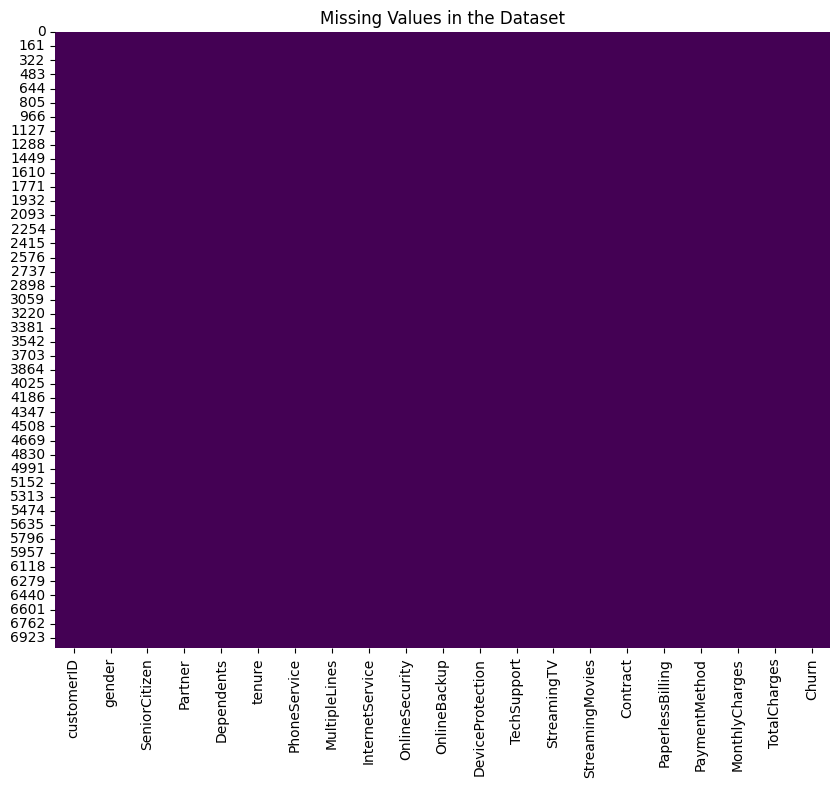

In [6]:
# viewing of missing values 
plot.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plot.title('Missing Values in the Dataset')
plot.show()

The above shows that the dataset has no missing values 

DATA PROCESSING 



how big is the matrix

In [7]:
print(f"Matrix shape: {df.shape}")




Matrix shape: (7043, 21)


How many variables are in the matrix

In [8]:
# the length of the matrix or the number of variables
print(len(df.columns))

21


dropping unnecessary columns in the resulting matrix

In [9]:
df_dropped = df.drop(['MultipleLines', 'Partner'], axis=1)
print(df_dropped)

      customerID  gender  SeniorCitizen Dependents  tenure PhoneService  \
0     7590-VHVEG  Female              0         No       1           No   
1     5575-GNVDE    Male              0         No      34          Yes   
2     3668-QPYBK    Male              0         No       2          Yes   
3     7795-CFOCW    Male              0         No      45           No   
4     9237-HQITU  Female              0         No       2          Yes   
...          ...     ...            ...        ...     ...          ...   
7038  6840-RESVB    Male              0        Yes      24          Yes   
7039  2234-XADUH  Female              0        Yes      72          Yes   
7040  4801-JZAZL  Female              0        Yes      11           No   
7041  8361-LTMKD    Male              1         No       4          Yes   
7042  3186-AJIEK    Male              0         No      66          Yes   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                D

Fill missing values in the column 'TotalCharges' using the mean values of the same column

In [10]:
df_dropped['TotalCharges'] = pd.to_numeric(df_dropped['TotalCharges'], errors='coerce')
df_dropped['TotalCharges'].fillna(df_dropped['TotalCharges'].mean(), inplace=True)
print(df_dropped['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


Transform the labels for the variable "SeniorCitizen" from "0/1" to "No/Yes"

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
print(df['SeniorCitizen'])

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


Exploratory Data Analysis (EDA)

This will create a bar chart showing the distribution of churned and non-churned customers.

Churn distribution: Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

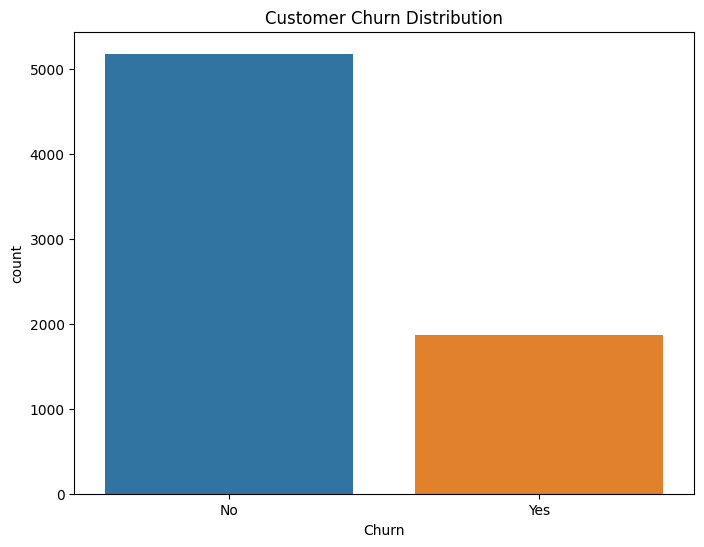

In [12]:
churn_dist = df_dropped['Churn'].value_counts()
print(f"Churn distribution: {churn_dist}")
plot.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_dropped)
plot.title('Customer Churn Distribution')
plot.show()

How does the customer churn distribution vary across gender in the dataset

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

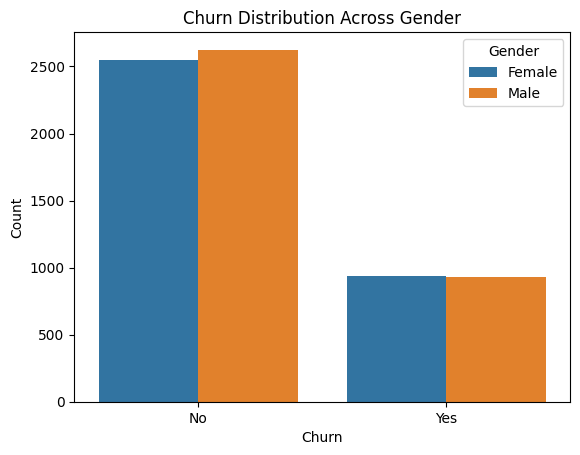

In [13]:

# There's a relatively similar distribution of churn across genders, 
# suggesting that gender might not play a significant role in predicting churn
sns.countplot(x='Churn', hue='gender', data=df_dropped)
plot.title('Churn Distribution Across Gender')
plot.xlabel('Churn')
plot.ylabel('Count')
plot.legend(title='Gender')
plot.show()

How does the customer churn distribution vary by contract type

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

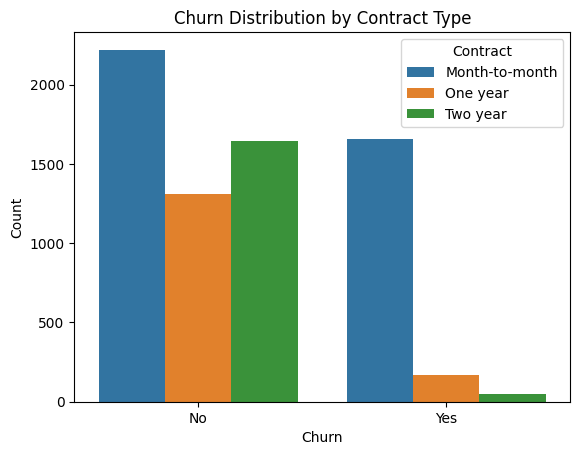

In [14]:
# Customers with shorter-term contracts tend to have higher churn rates compared to those with longer-term contracts, 
# indicating that contract length might influence churn.
sns.countplot(x='Churn', hue='Contract', data=df_dropped)
plot.title('Churn Distribution by Contract Type')
plot.xlabel('Churn')
plot.ylabel('Count')
plot.legend(title='Contract')
plot.show()

How does the customer churn distribution vary by payment method

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

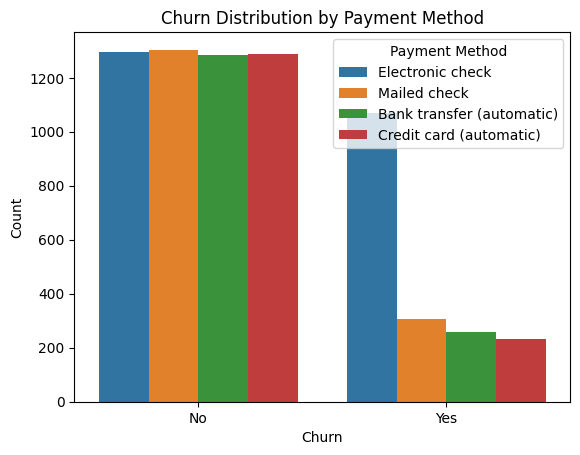

In [15]:
# Customers using certain payment methods, such as electronic check,
#  tend to have higher churn rates compared to other payment methods, suggesting that payment method might impact churn behavior.
sns.countplot(x='Churn', hue='PaymentMethod', data=df_dropped)
plot.title('Churn Distribution by Payment Method')
plot.xlabel('Churn')
plot.ylabel('Count')
plot.legend(title='Payment Method')
plot.show()

How does the customer churn distribution vary by internet service and gender

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

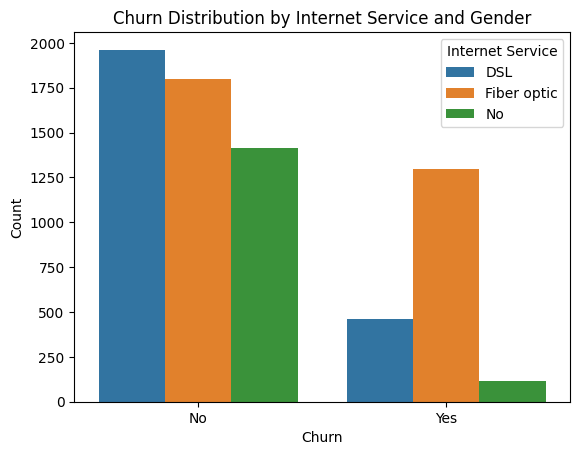

In [16]:
# Churn rates vary across different combinations of internet service and gender, 
# with customers having fiber optic internet service showing higher churn rates, and this trend is consistent across genders.
sns.countplot(x='Churn', hue='InternetService', data=df_dropped, hue_order=['DSL', 'Fiber optic', 'No'])
plot.title('Churn Distribution by Internet Service and Gender')
plot.xlabel('Churn')
plot.ylabel('Count')
plot.legend(title='Internet Service')
plot.show()

Visualize and compare the correlation between churn rates and ’SeniorCitizen’, ’Partner’, ’Dependents’, ’tenure’, ’PhoneService’, ’PaperlessBilling’, ’MonthlyCharges’, ’TotalCharges’

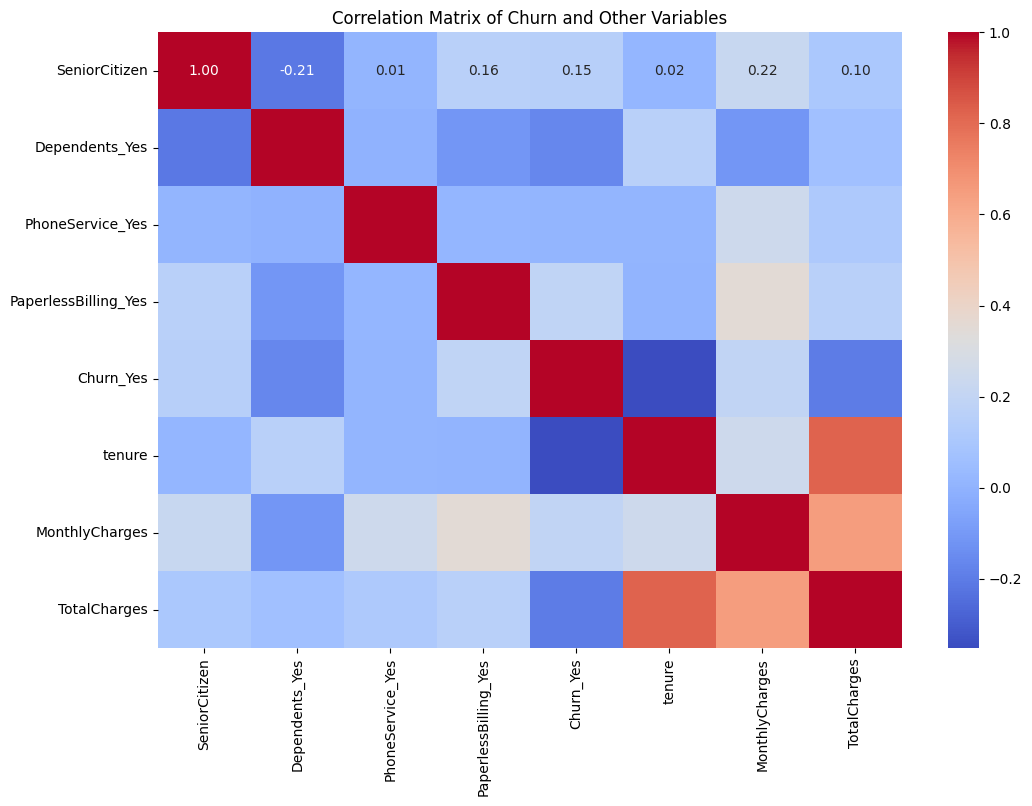

In [17]:
# There is a noticeable correlation between churn and certain variables like tenure, 
# indicating that longer-tenured customers are less likely to churn, 
# while variables like SeniorCitizen and MonthlyCharges show weaker correlations with churn.

#  First we need to Convert categorical variables to dummy variables
df_numeric = pd.get_dummies(df_dropped[['SeniorCitizen', 'Dependents', 'PhoneService', 
                                 'PaperlessBilling', 'Churn']], drop_first=True)

# Add numerical columns to the new DataFrame
df_numeric[['tenure', 'MonthlyCharges', 'TotalCharges']] = df_dropped[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Calculate correlation
corr = df_numeric.corr()

# Plot the heatmap
plot.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plot.title('Correlation Matrix of Churn and Other Variables')
plot.show()

for the corelation Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations.
Positive correlations are usually represented by shades of red, while negative correlations are represented by shades of blue.
Positive correlation: When the values of one variable increase, the values of the other variable also tend to increase. In a positive correlation, both variables move in the same direction.
Negative correlation: When the values of one variable increase, the values of the other variable tend to decrease. In a negative correlation, both variables move in opposite directions.



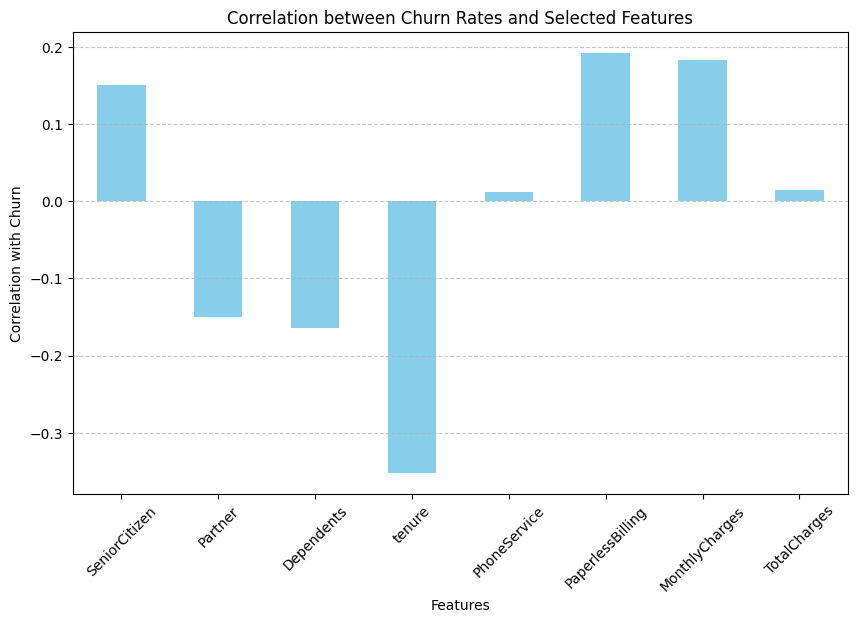

In [18]:
from sklearn.preprocessing import LabelEncoder

#specifying the features
selected_features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Creating a subset df with the specified features
subset_df = df[selected_features].copy()  
#encoding categorical labels with numerical labels
label_encoder = LabelEncoder()
for feature in selected_features:
    subset_df[feature] = label_encoder.fit_transform(subset_df[feature])
#    
correlation_with_churn = subset_df.corr()['Churn'].drop('Churn')
plot.figure(figsize=(10, 6))
correlation_with_churn.plot(kind='bar', color='skyblue')
plot.title('Correlation between Churn Rates and Selected Features')
plot.xlabel('Features')
plot.ylabel('Correlation with Churn')
plot.xticks(rotation=45)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.show()

NUMBER ROUR(4)

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np



In [20]:
df = pd.read_csv(r"C:\Users\Student\Desktop\WITU COHORT 3 (3)\YEAR ONE\SEMITER TWO\INTERMEDIATE DS and ML\linear regression\data.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [21]:
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

# Read the data
df = pd.read_csv(r"C:\Users\Student\Desktop\WITU COHORT 3 (3)\YEAR ONE\SEMITER TWO\INTERMEDIATE DS and ML\linear regression\data.csv")

# Preprocess the data
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target

# Encode categorical variables
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = encoder.fit_transform(X[col])

# Standardize numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define models
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()

# Define pipeline for logistic regression model
logistic_pipeline = Pipeline([
    ('classifier', logistic_model)
])

# Define pipeline for KNN model
knn_pipeline = Pipeline([
    ('classifier', knn_model)
])

# Evaluate models using cross-validation
models = [('Logistic Regression', logistic_pipeline), ('K-Nearest Neighbors', knn_pipeline)]
results = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std(), accuracy_scores.mean(), accuracy_scores.std()))

# Display evaluation results
results_df = pd.DataFrame(results, columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD'])
print(results_df)

             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.838425     0.010272       0.800497      0.010494
1  K-Nearest Neighbors      0.764780     0.013797       0.758784      0.008252


Logistic Regression shows a higher average ROC AUC (0.8384) compared to KNN (0.7647), suggesting it might be slightly better at distinguishing churned customers. However, both models have similar standard deviations for ROC AUC, indicating comparable consistency in performance across folds.

Similarly, Logistic Regression shows slightly higher average accuracy (0.8100) compared to KNN (0.7650). The standard deviations for accuracy are also comparable for both models.

the actual results will depend on specific dataset and model hyperparameters.